In [5]:
import numpy as np
import pandas as pd
import sklearn
import librosa
from pathlib import Path
import sys

project_root = Path("/Users/daniellevy/bioacoustic-classifier")
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
from src.baseline_model import train_baseline_model
from src.model_performance import compute_accuracy_measures, plot_confusion_matrix

In [6]:
df = pd.read_csv(str(Path(project_root / "data" / "processed_data" / "baseline_model.csv")),  index_col=0)
feature_cols = ['rms', 'zcr','spec_cent', 'spec_bw', 'rolloff', 'flatness', 'contrast']

In [7]:
folds = [1, 2, 3, 4, 5]
test_fold = 4 # choose
train_folds = [f for f in folds if f != test_fold]

test = df[df['fold'] == test_fold]
train = df[df['fold'].isin(train_folds)]

X_train = train[feature_cols].values
X_test = test[feature_cols].values

y_train = train['category']
y_test = test['category']

del test
del train

In [8]:
model_lr, scaler_lr = train_baseline_model(
    X_train, y_train, 
    model_type='lr',
    C=0.5,
    penalty='l2',
    solver='lbfgs'
)

In [9]:
model_rf, scaler_rf = train_baseline_model(
    X_train, y_train, 
    model_type='rf',
    n_estimators=300,
    max_depth=10,
    min_samples_split=4
)

In [10]:
X_test_scaled_lr = scaler_lr.transform(X_test)
X_test_scaled_rf = scaler_rf.transform(X_test)

y_pred_lr = model_lr.predict(X_test_scaled_lr)
y_pred_rf = model_rf.predict(X_test_scaled_rf)

In [11]:
# lr stats
compute_accuracy_measures(y_test, y_pred_lr)

Accuracy: 0.225
Precision (macro): 0.20652051543228012
Recall (macro): 0.225
F1 (macro): 0.19461204032732268

Detailed classification report:
                  precision    recall  f1-score   support

        airplane       0.21      0.62      0.31         8
       breathing       0.00      0.00      0.00         8
  brushing_teeth       0.14      0.12      0.13         8
     can_opening       1.00      0.12      0.22         8
        car_horn       0.25      0.25      0.25         8
             cat       0.50      0.25      0.33         8
        chainsaw       0.22      0.25      0.24         8
  chirping_birds       0.43      0.38      0.40         8
    church_bells       0.14      0.38      0.21         8
        clapping       0.38      0.38      0.38         8
     clock_alarm       0.43      0.38      0.40         8
      clock_tick       0.06      0.12      0.08         8
        coughing       0.25      0.12      0.17         8
             cow       0.00      0.00      0.

/opt/anaconda3/envs/bioaudio/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [12]:
# rf stats
compute_accuracy_measures(y_test, y_pred_rf)

Accuracy: 0.26
Precision (macro): 0.22912812351047646
Recall (macro): 0.26
F1 (macro): 0.22777314287553427

Detailed classification report:
                  precision    recall  f1-score   support

        airplane       0.20      0.25      0.22         8
       breathing       0.00      0.00      0.00         8
  brushing_teeth       0.23      0.38      0.29         8
     can_opening       0.33      0.38      0.35         8
        car_horn       0.50      0.25      0.33         8
             cat       0.25      0.12      0.17         8
        chainsaw       0.30      0.38      0.33         8
  chirping_birds       0.29      0.25      0.27         8
    church_bells       0.25      0.62      0.36         8
        clapping       0.40      0.25      0.31         8
     clock_alarm       0.33      0.25      0.29         8
      clock_tick       0.00      0.00      0.00         8
        coughing       0.00      0.00      0.00         8
             cow       0.00      0.00      0.00

/opt/anaconda3/envs/bioaudio/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


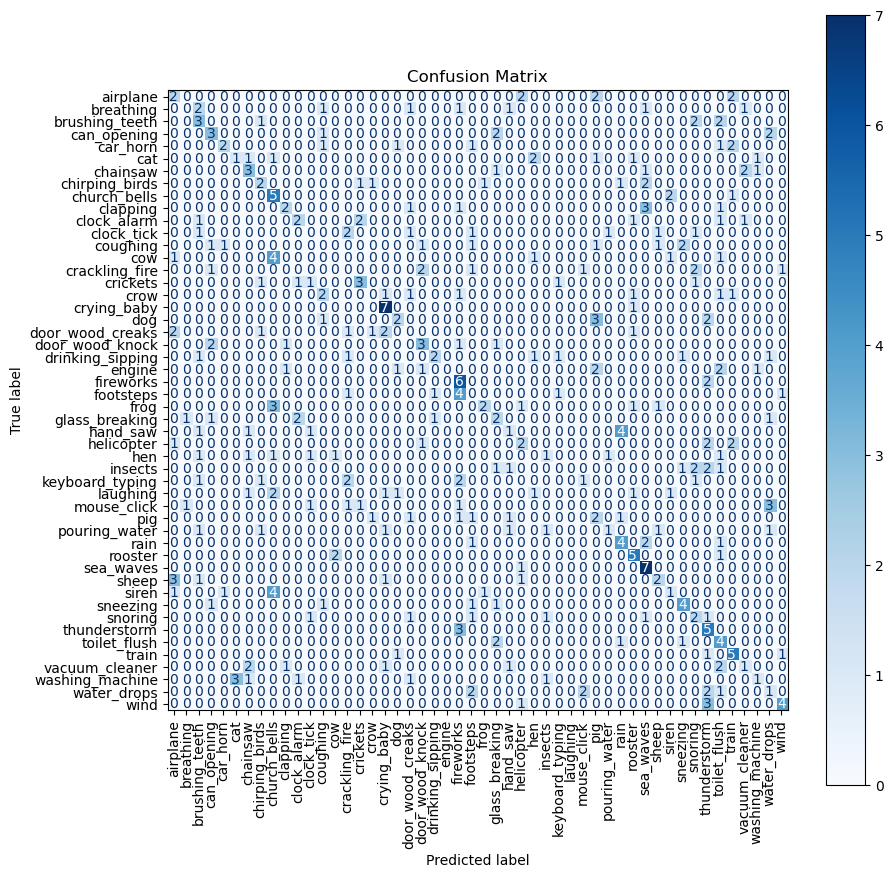

In [13]:
plot_confusion_matrix(y_pred_rf, y_test, model_rf)